In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def plot_val_acc(csvpath):
    df = pd.read_csv(csvpath)
    
    # Plotting val_accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-')
    plt.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-')

    plt.title('Validation Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.grid(True)
    plt.show()

In [23]:
def plot_val_acc(csvpath, scale='arithmetic'):
    df = pd.read_csv(csvpath)
    
    # Plotting val_accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-')
    plt.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-')

    plt.title('Validation Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    if scale == 'arithmetic':
        plt.grid(True)
    elif scale == 'log':
        plt.xscale('log')
        plt.grid(True, which="both", ls="--", c='0.7')  # this will ensure that the grid appears correctly on log scale
    plt.show()

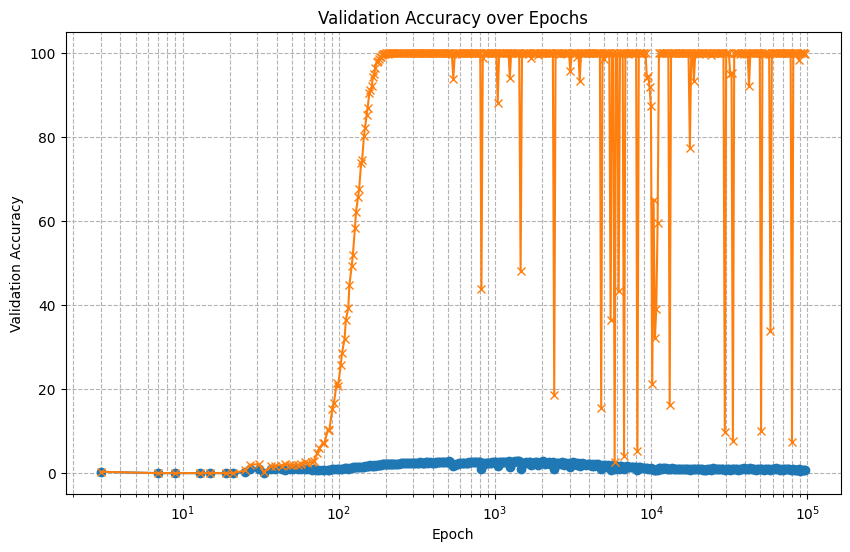

In [36]:
plot_val_acc("../run-addition-frac-p35-trpct-10/lightning_logs/version_0/metrics.csv", 'log')